In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# import tensorflow_decision_forests as tfdf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [4]:
# master_dataset = pd.read_csv('CreatingDataset/ppmi_master_dataset.csv')

In [5]:
# master_dataset.head()

In [6]:
# master_dataset.isnull().sum()

In [7]:
# master_dataset = master_dataset.ffill()

In [8]:
# master_dataset.isnull().sum()

In [9]:
# master_dataset.to_csv('CreatingDataset/no_missing_value_ppmi_master_dataset.csv', index=False)

In [10]:
master_dataset = pd.read_csv('CreatingDataset/no_missing_value_ppmi_master_dataset.csv')

In [11]:
master_dataset.head()

,Patient ID,Visit Date,EVENT_ID,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,brightness,contrast,correlation,dissimilarity,energy,gabor_energy,gabor_entropy,homogeneity,lbp_energy,lbp_entropy
0,3010,13/07/2011,BL,0.0,1.0,1.0,0.0,2.0,0.0,0.0,...,0.007926,158.463741,0.831520,0.816963,0.989929,9.525620,379.868298,0.995363,0.990573,0.054468
1,3010,26/06/2012,V04,1.0,2.0,1.0,0.0,2.0,0.0,0.0,...,0.018020,326.583983,0.852982,1.562270,0.977459,17.621092,781.401212,0.991459,0.983486,0.089167
2,3010,17/07/2013,V06,2.0,2.0,1.0,0.0,2.0,0.0,1.0,...,0.012063,178.744707,0.882104,0.894156,0.985684,13.268292,519.371246,0.994178,0.988597,0.064722
3,3010,26/06/2015,V10,1.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0.014601,296.968707,0.837949,1.390070,0.982016,16.052184,658.612867,0.992227,0.984798,0.082195
4,3012,11/10/2011,SC,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.013327,167.855630,0.899377,0.768224,0.984650,15.227890,573.424163,0.996028,0.990869,0.053686


In [12]:
# # Convert Visit Date to datetime format
# master_dataset['Visit Date'] = pd.to_datetime(master_dataset['Visit Date'], format='%d/%m/%Y')
# 
# # Group by Patient ID, Visit Date, and EVENT_ID
# grouped_master_dataset = master_dataset.groupby(['Patient ID', 'Visit Date', 'EVENT_ID']).sum().reset_index()

In [13]:
# grouped_master_dataset.to_csv('CreatingDataset/grouped_no_missing_value_ppmi_master_dataset.csv', index=False)

In [14]:
# grouped_master_dataset

In [15]:
# unique_patients = grouped_master_dataset['Patient ID'].nunique()
# print(unique_patients)

In [16]:
# Load the dataset
master_dataset = pd.read_csv('CreatingDataset/no_missing_value_ppmi_master_dataset.csv')

# Convert Visit Date to datetime format
master_dataset['Visit Date'] = pd.to_datetime(master_dataset['Visit Date'], format='%d/%m/%Y')

# Group by Patient ID, Visit Date, and EVENT_ID (sum is not necessary if there are no numeric columns to aggregate)
grouped_master_dataset = master_dataset.groupby(['Patient ID', 'Visit Date', 'EVENT_ID']).first().reset_index()

# Calculate the first visit date for each patient
grouped_master_dataset['first_visit_date'] = grouped_master_dataset.groupby('Patient ID')['Visit Date'].transform('min')

# Calculate the interval in months from the first visit date
grouped_master_dataset['month_interval'] = grouped_master_dataset.apply(
    lambda row: (row['Visit Date'].year - row['first_visit_date'].year) * 12 + (row['Visit Date'].month - row['first_visit_date'].month),
    axis=1
)

# Drop the first_visit_date column if it's not needed
grouped_master_dataset = grouped_master_dataset.drop(columns=['first_visit_date'])

# Reorder columns to place month_interval next to Visit Date
cols = list(grouped_master_dataset.columns)
visit_date_index = cols.index('Visit Date')
# Move month_interval to the position after Visit Date
cols.insert(visit_date_index + 1, cols.pop(cols.index('month_interval')))
grouped_master_dataset = grouped_master_dataset[cols]

In [17]:
grouped_master_dataset

,Patient ID,Visit Date,month_interval,EVENT_ID,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,...,brightness,contrast,correlation,dissimilarity,energy,gabor_energy,gabor_entropy,homogeneity,lbp_energy,lbp_entropy
0,3010,2011-07-13,0,BL,0.0,1.0,1.0,0.0,2.0,0.0,...,0.007926,158.463741,0.831520,0.816963,0.989929,9.525620,379.868298,0.995363,0.990573,0.054468
1,3010,2012-06-26,11,V04,1.0,2.0,1.0,0.0,2.0,0.0,...,0.018020,326.583983,0.852982,1.562270,0.977459,17.621092,781.401212,0.991459,0.983486,0.089167
2,3010,2013-07-17,24,V06,2.0,2.0,1.0,0.0,2.0,0.0,...,0.012063,178.744707,0.882104,0.894156,0.985684,13.268292,519.371246,0.994178,0.988597,0.064722
3,3010,2015-06-26,47,V10,1.0,2.0,0.0,0.0,2.0,0.0,...,0.014601,296.968707,0.837949,1.390070,0.982016,16.052184,658.612867,0.992227,0.984798,0.082195
4,3012,2011-10-11,0,SC,0.0,2.0,0.0,1.0,0.0,0.0,...,0.013327,167.855630,0.899377,0.768224,0.984650,15.227890,573.424163,0.996028,0.990869,0.053686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,137450,2024-03-19,27,V06,1.0,2.0,1.0,2.0,2.0,2.0,...,0.018947,720.422511,0.685260,3.253121,0.972526,20.735130,945.195488,0.982511,0.972334,0.133635
908,142004,2022-02-24,0,BL,1.0,1.0,0.0,2.0,2.0,2.0,...,0.015122,209.292168,0.890132,1.108192,0.981616,15.682664,664.117954,0.992613,0.986875,0.073646
909,142004,2022-11-07,9,V02,1.0,2.0,2.0,2.0,3.0,2.0,...,0.015591,521.905040,0.711337,2.744637,0.972261,15.482913,804.136152,0.979712,0.970353,0.142520
910,142004,2023-04-03,14,V04,0.0,1.0,1.0,1.0,2.0,1.0,...,0.017739,190.860029,0.910562,0.914200,0.979811,17.088529,712.152217,0.994828,0.988797,0.063939


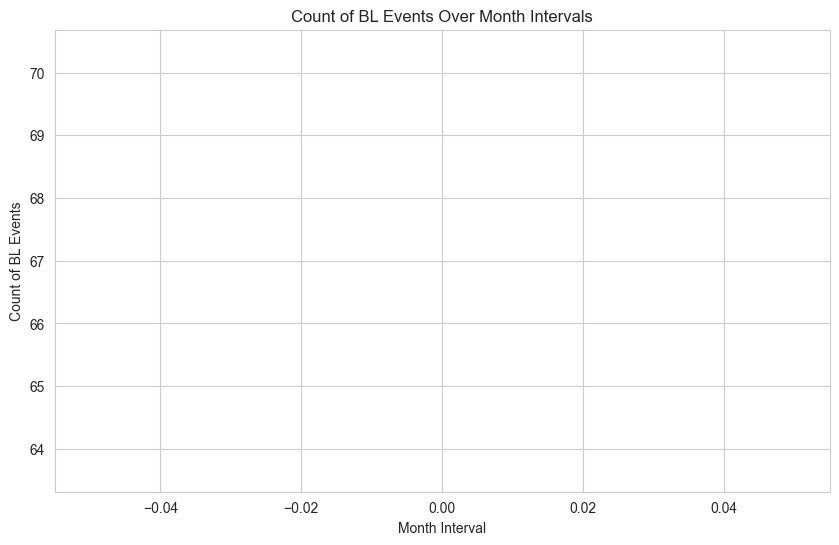

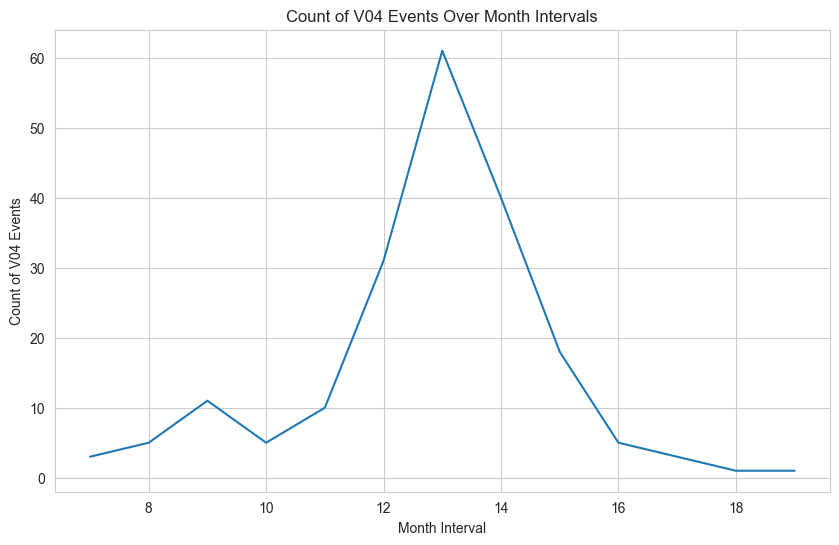

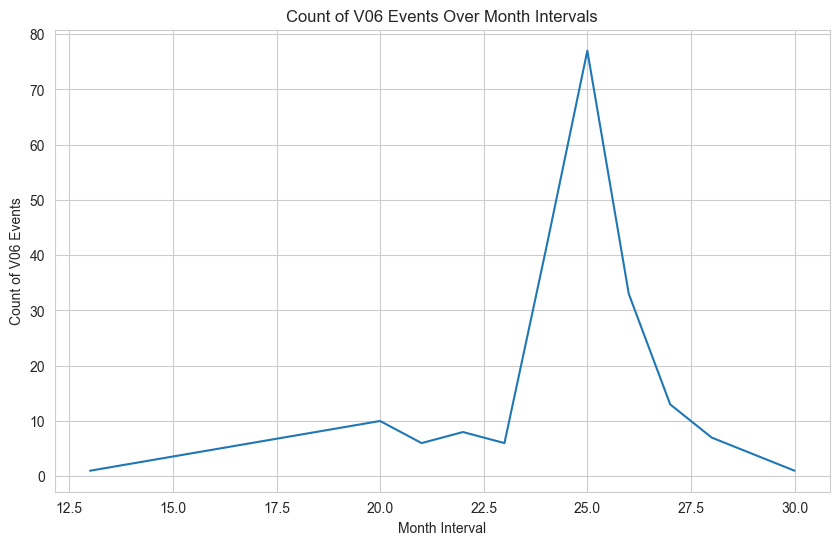

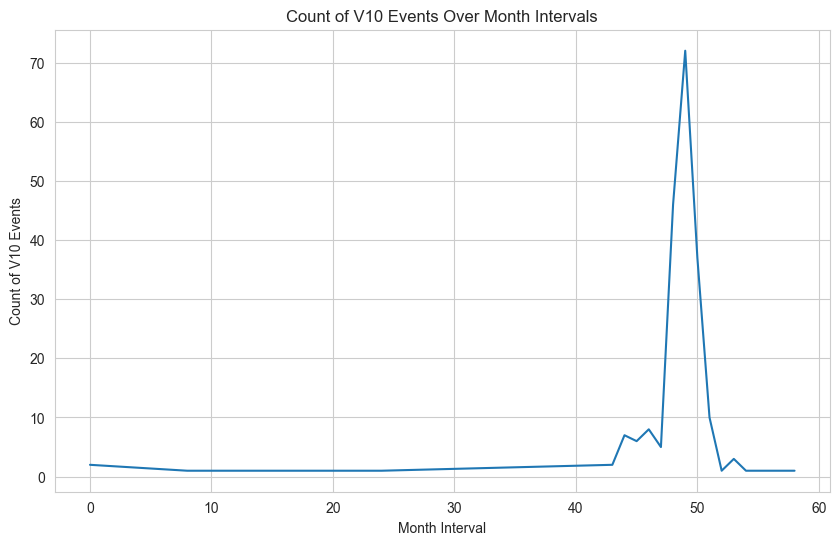

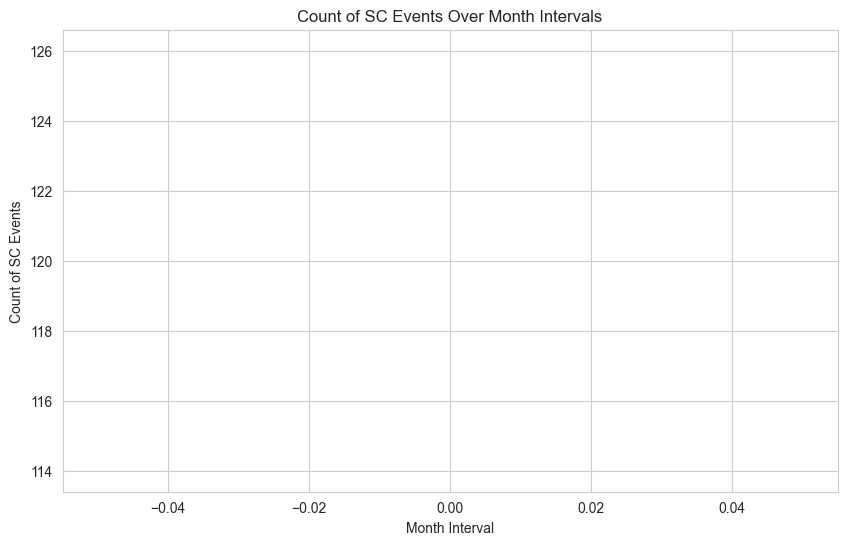

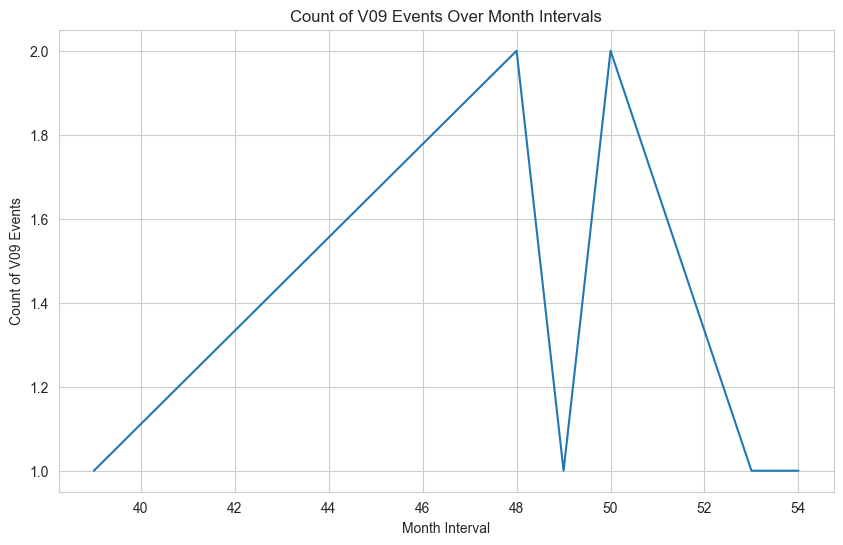

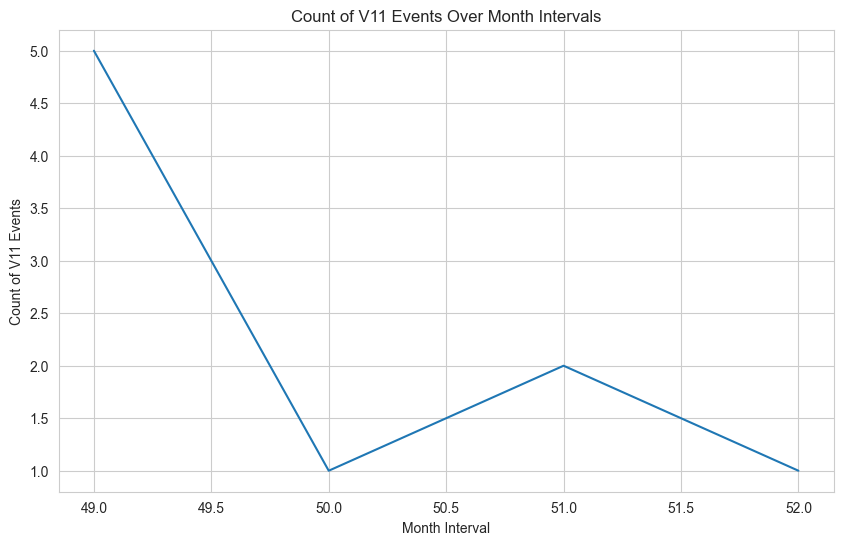

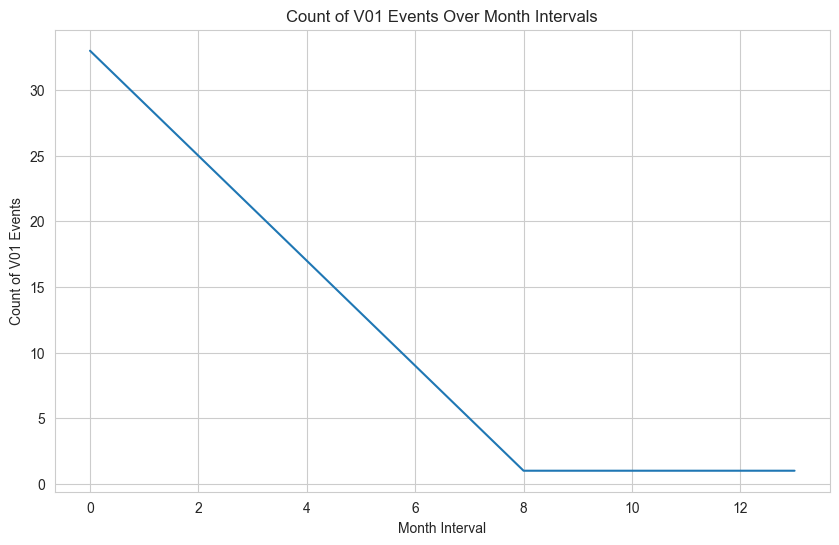

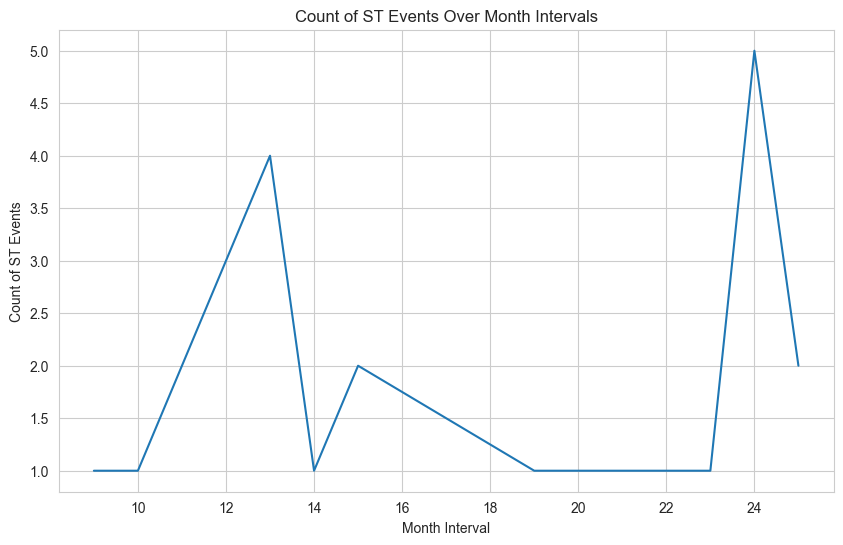

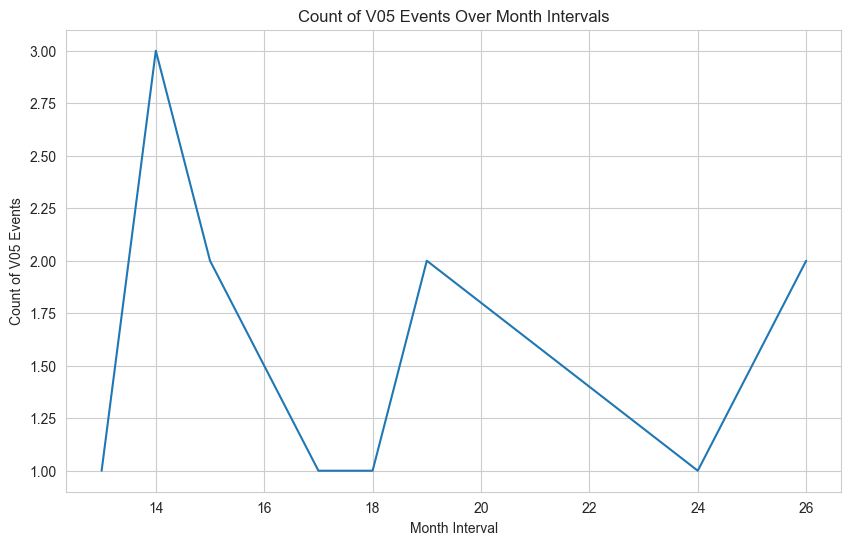

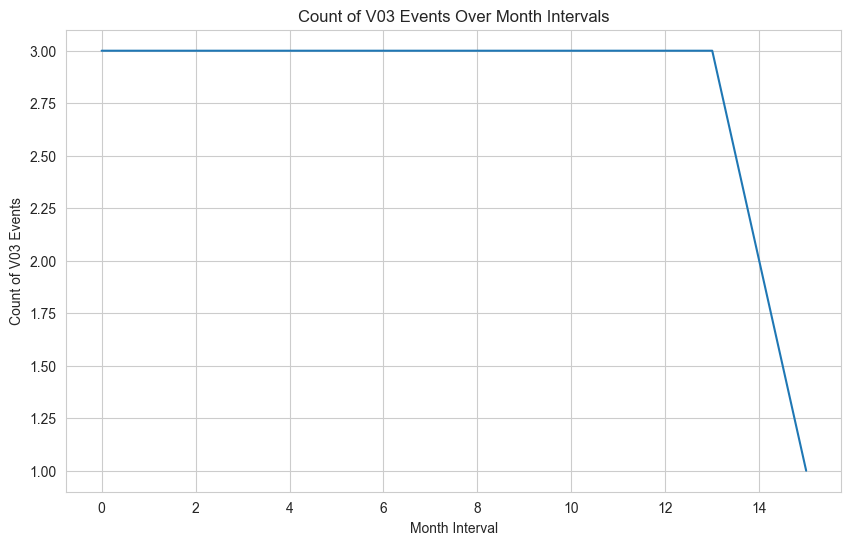

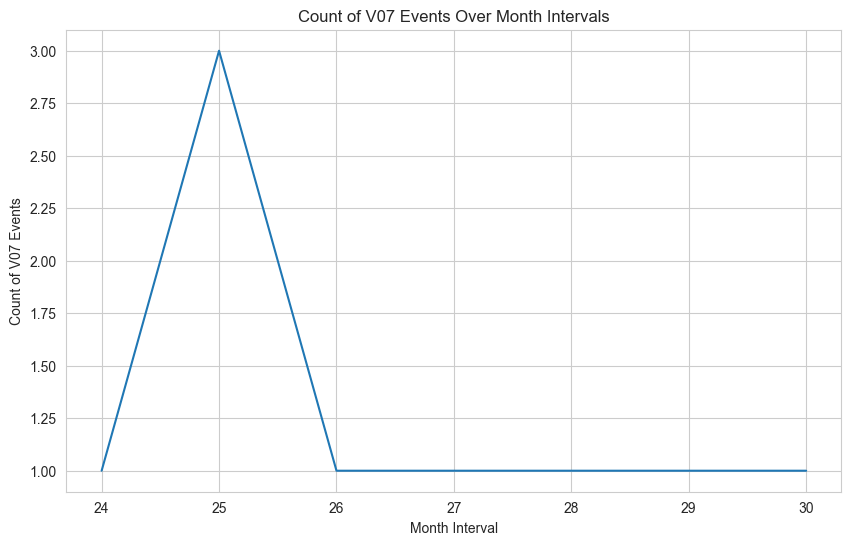

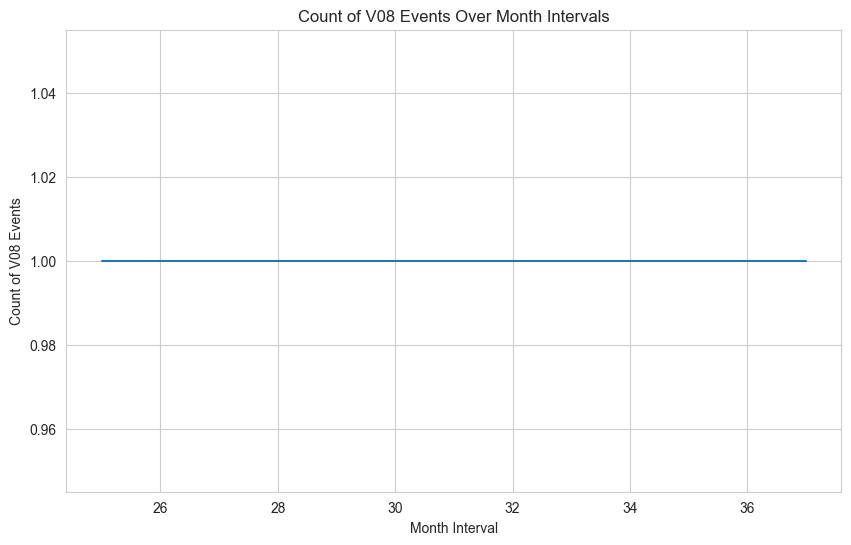

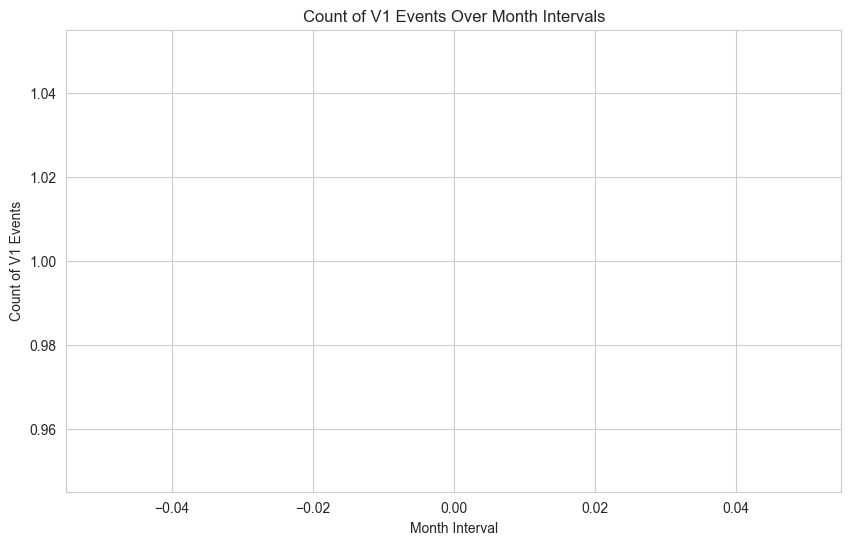

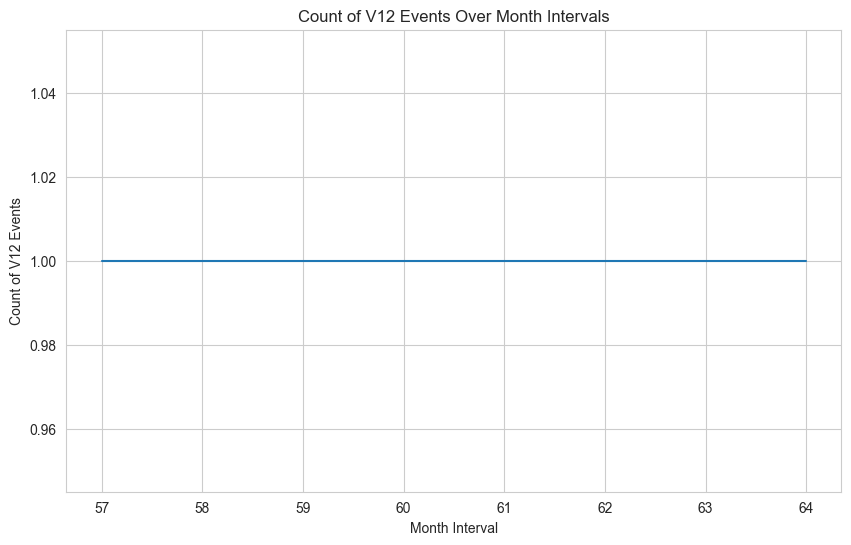

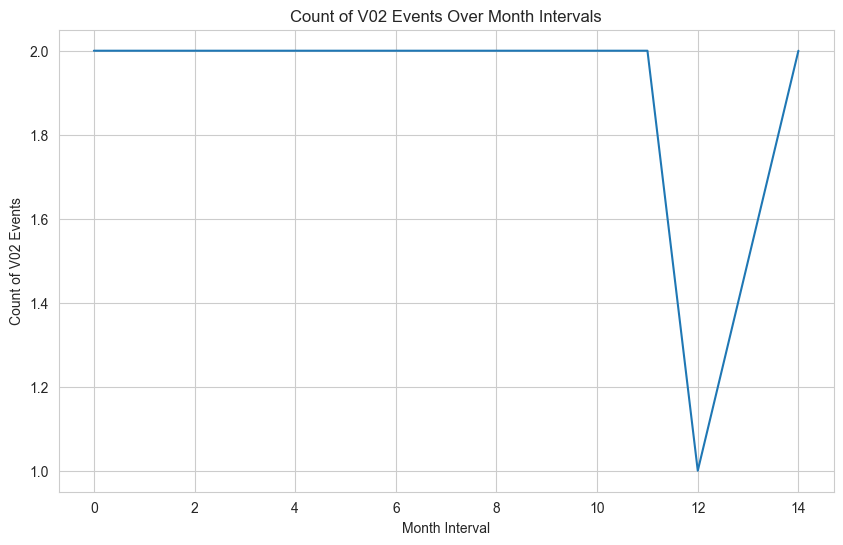

In [18]:
import matplotlib.pyplot as plt

# Get all unique EVENT_IDs
unique_event_ids = grouped_master_dataset['EVENT_ID'].unique()

for event_id in unique_event_ids:
    # Filter the DataFrame
    event_data = grouped_master_dataset[grouped_master_dataset['EVENT_ID'] == event_id]

    # Count the number of current EVENT_ID events for each 'month_interval'
    event_counts = event_data['month_interval'].value_counts().sort_index()

    # Create the plot
    plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the plot
    plt.plot(event_counts.index, event_counts.values)

    # Add labels and title
    plt.xlabel('Month Interval')
    plt.ylabel(f'Count of {event_id} Events')
    plt.title(f'Count of {event_id} Events Over Month Intervals')

    # Display the plot
    plt.show()

In [19]:
# modes = grouped_master_dataset['month_interval'].value_counts().nlargest(4)
# print(modes)

In [20]:
# bins = range(0, grouped_master_dataset['month_interval'].max() + 10, 10)
# grouped_master_dataset['month_interval_range'] = pd.cut(grouped_master_dataset['month_interval'], bins)

In [21]:
# modes = grouped_master_dataset['month_interval_range'].value_counts().nlargest(4)
# print(modes)

In [22]:
# Define a function to classify the visit
def classify_visit(month_interval):
    if 0 <= month_interval <= 7:
        return 'First Visit'
    elif 8 <= month_interval <= 18:
        return 'Second Visit'
    elif 19 <= month_interval <= 29:
        return 'Third Visit'
    else:
        return 'Fourth Visit'

# Create the visit_class column
grouped_master_dataset['Visit_Class'] = grouped_master_dataset['month_interval'].apply(classify_visit)

# # Display the result
# print(grouped_master_dataset)

In [24]:
# Get the list of column names
cols = list(grouped_master_dataset.columns)

# Find the current index of 'month_interval' and 'Visit_Class'
month_interval_index = cols.index('month_interval')
visit_class_index = cols.index('Visit_Class')

# Remove 'Visit_Class' from its current position
cols.pop(visit_class_index)

# Insert 'Visit_Class' after 'month_interval'
cols.insert(month_interval_index + 1, 'Visit_Class')

# Reorder the DataFrame
grouped_master_dataset = grouped_master_dataset[cols]

In [25]:
grouped_master_dataset

,Patient ID,Visit Date,month_interval,Visit_Class,EVENT_ID,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,...,brightness,contrast,correlation,dissimilarity,energy,gabor_energy,gabor_entropy,homogeneity,lbp_energy,lbp_entropy
0,3010,2011-07-13,0,First Visit,BL,0.0,1.0,1.0,0.0,2.0,...,0.007926,158.463741,0.831520,0.816963,0.989929,9.525620,379.868298,0.995363,0.990573,0.054468
1,3010,2012-06-26,11,Second Visit,V04,1.0,2.0,1.0,0.0,2.0,...,0.018020,326.583983,0.852982,1.562270,0.977459,17.621092,781.401212,0.991459,0.983486,0.089167
2,3010,2013-07-17,24,Third Visit,V06,2.0,2.0,1.0,0.0,2.0,...,0.012063,178.744707,0.882104,0.894156,0.985684,13.268292,519.371246,0.994178,0.988597,0.064722
3,3010,2015-06-26,47,Fourth Visit,V10,1.0,2.0,0.0,0.0,2.0,...,0.014601,296.968707,0.837949,1.390070,0.982016,16.052184,658.612867,0.992227,0.984798,0.082195
4,3012,2011-10-11,0,First Visit,SC,0.0,2.0,0.0,1.0,0.0,...,0.013327,167.855630,0.899377,0.768224,0.984650,15.227890,573.424163,0.996028,0.990869,0.053686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,137450,2024-03-19,27,Third Visit,V06,1.0,2.0,1.0,2.0,2.0,...,0.018947,720.422511,0.685260,3.253121,0.972526,20.735130,945.195488,0.982511,0.972334,0.133635
908,142004,2022-02-24,0,First Visit,BL,1.0,1.0,0.0,2.0,2.0,...,0.015122,209.292168,0.890132,1.108192,0.981616,15.682664,664.117954,0.992613,0.986875,0.073646
909,142004,2022-11-07,9,Second Visit,V02,1.0,2.0,2.0,2.0,3.0,...,0.015591,521.905040,0.711337,2.744637,0.972261,15.482913,804.136152,0.979712,0.970353,0.142520
910,142004,2023-04-03,14,Second Visit,V04,0.0,1.0,1.0,1.0,2.0,...,0.017739,190.860029,0.910562,0.914200,0.979811,17.088529,712.152217,0.994828,0.988797,0.063939


In [31]:
grouped_master_dataset.columns

Index(['Patient ID', 'Visit Date', 'month_interval', 'Visit_Class', 'EVENT_ID',
       'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL',
       'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR',
       'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG',
       'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR',
       'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL',
       'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SPCH',
       'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT',
       'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ',
       'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 'NP1URIN', 'NP1CNST', 'NP1LTHD',
       'NP1FATG', 'NP1COG', 'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT',
       'NP1DDS', 'CONCOHORT', 'Area', 'Circularity', 'ConvexArea',
       'EquivDiameter', 'Extent', 'FilledArea', 'Kurtosis',
       'Major axis length', 'Mean', 'M

In [37]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import mutual_info_classif, RFE
# from sklearn.linear_model import LogisticRegression
# from skfeature.function.similarity_based import fisher_score
# 
# # Assuming df is your DataFrame and 'target' is your target column
# X = grouped_master_dataset.drop(columns=['Patient ID', 'Visit Date', 'month_interval', 'Visit_Class', 'EVENT_ID', 'CONCOHORT'])
# y = grouped_master_dataset['Visit_Class']
# 
# # Random Forest Feature Importance
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X, y)
# importances = rf.feature_importances_
# indices = np.argsort(importances)[::-1]
# 
# plt.figure(figsize=(12, 6))
# plt.title('Random Forest Feature Importances')
# plt.bar(range(X.shape[1]), importances[indices], align='center')
# plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
# plt.xlim([-1, X.shape[1]])
# plt.show()
# 
# # Information Gain (Mutual Information)
# mi = mutual_info_classif(X, y)
# 
# plt.figure(figsize=(12, 6))
# plt.title('Mutual Information')
# plt.bar(range(X.shape[1]), mi[indices], align='center')
# plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
# plt.xlim([-1, X.shape[1]])
# plt.show()
# 
# # Fisher Score
# scores = fisher_score.fisher_score(X.values, y.values)
# 
# plt.figure(figsize=(12, 6))
# plt.title('Fisher Score')
# plt.bar(range(X.shape[1]), scores[indices], align='center')
# plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
# plt.xlim([-1, X.shape[1]])
# plt.show()
# 
# # Recursive Feature Elimination (RFE)
# model = LogisticRegression(max_iter=10000)
# rfe = RFE(model, n_features_to_select=10)  # Adjust n_features_to_select as needed
# rfe = rfe.fit(X, y)
# 
# plt.figure(figsize=(12, 6))
# plt.title('RFE Feature Ranking')
# plt.bar(range(X.shape[1]), rfe.ranking_[indices], align='center')
# plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
# plt.xlim([-1, X.shape[1]])
# plt.show()

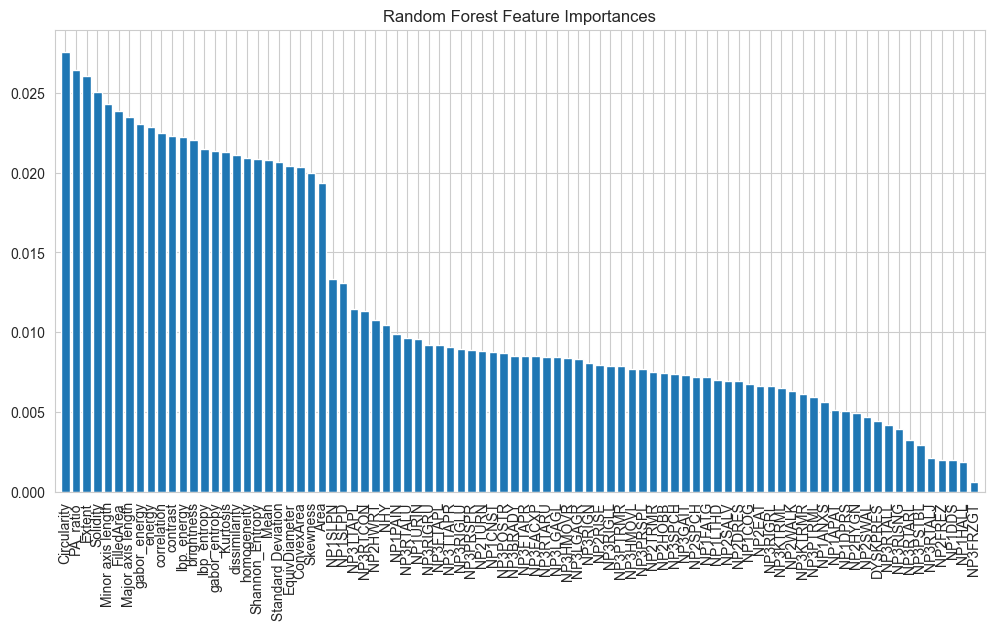

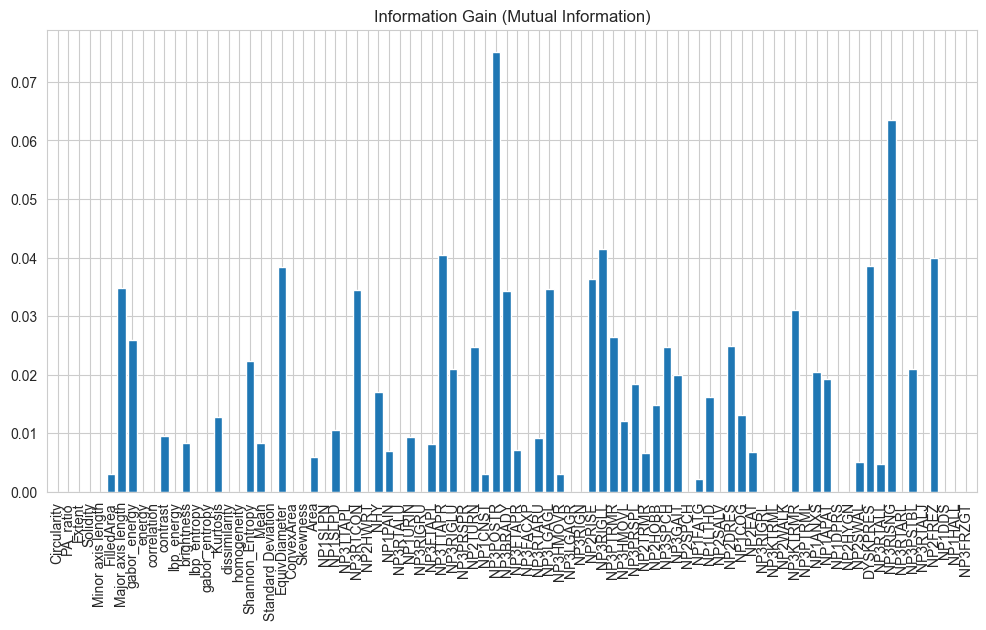

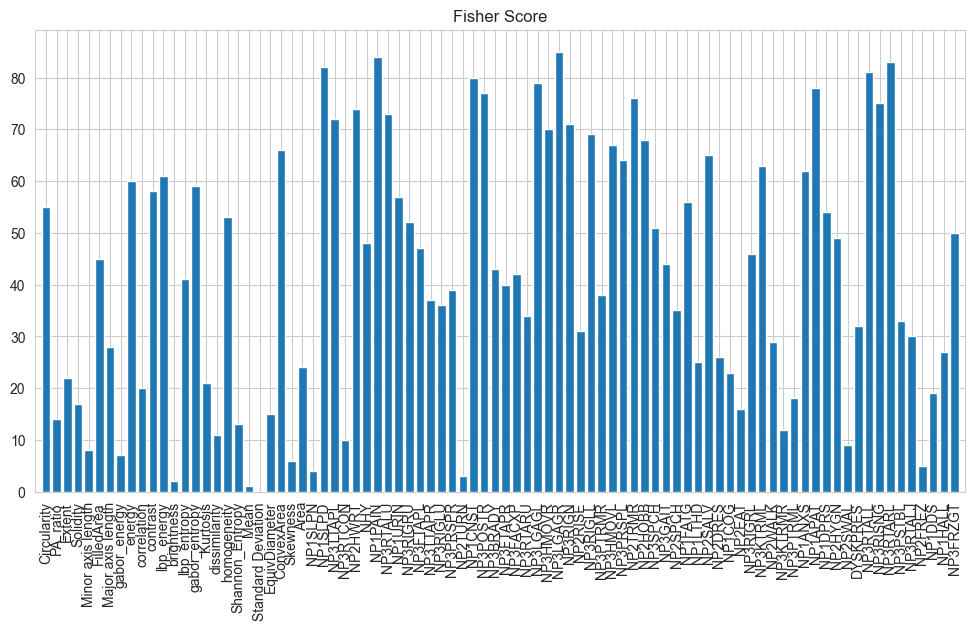

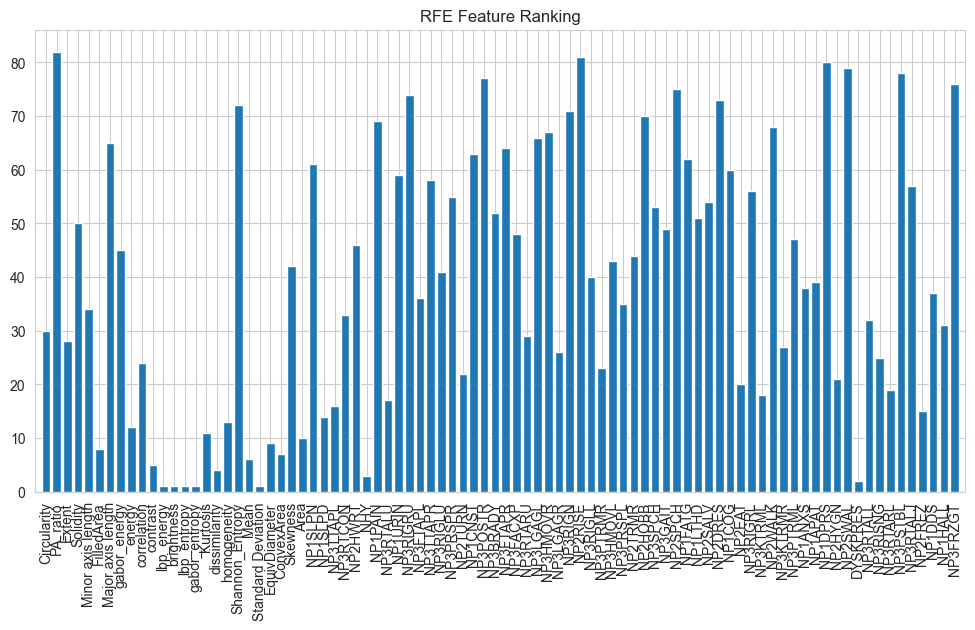

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from skfeature.function.similarity_based import fisher_score

# Assuming df is your DataFrame and 'target' is your target column
X = grouped_master_dataset.drop(columns=['Patient ID', 'Visit Date', 'month_interval', 'Visit_Class', 'EVENT_ID', 'CONCOHORT'])
y = grouped_master_dataset['Visit_Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Random Forest Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Information Gain (Mutual Information)
mi = mutual_info_classif(X_scaled, y)

plt.figure(figsize=(12, 6))
plt.title('Information Gain (Mutual Information)')
plt.bar(range(X.shape[1]), mi[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Fisher Score
scores = fisher_score.fisher_score(X_scaled, y.values)

plt.figure(figsize=(12, 6))
plt.title('Fisher Score')
plt.bar(range(X.shape[1]), scores[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=5)  # Adjust n_features_to_select as needed
rfe = rfe.fit(X_scaled, y)

plt.figure(figsize=(12, 6))
plt.title('RFE Feature Ranking')
plt.bar(range(X.shape[1]), rfe.ranking_[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Top performing columns:
Index(['NP3TTAPL', 'NP3RTALU', 'DYSKPRES', 'NHY', 'NP2FREZ', 'NP1SLPD', 'Area',
       'ConvexArea', 'EquivDiameter', 'FilledArea', 'Kurtosis', 'Mean',
       'Standard Deviation', 'brightness', 'contrast', 'dissimilarity',
       'energy', 'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'],
      dtype='object')
Random Forest Accuracy: 0.3005
Logistic Regression Accuracy: 0.3661
AdaBoost Accuracy: 0.3169
MLP Accuracy: 0.3224
Decision Tree Accuracy: 0.2842
Gradient Boosting Accuracy: 0.3169
KNN Accuracy: 0.3661
SVM Accuracy: 0.3880
Naive Bayes Accuracy: 0.2896
XGBoost Accuracy: 0.3607


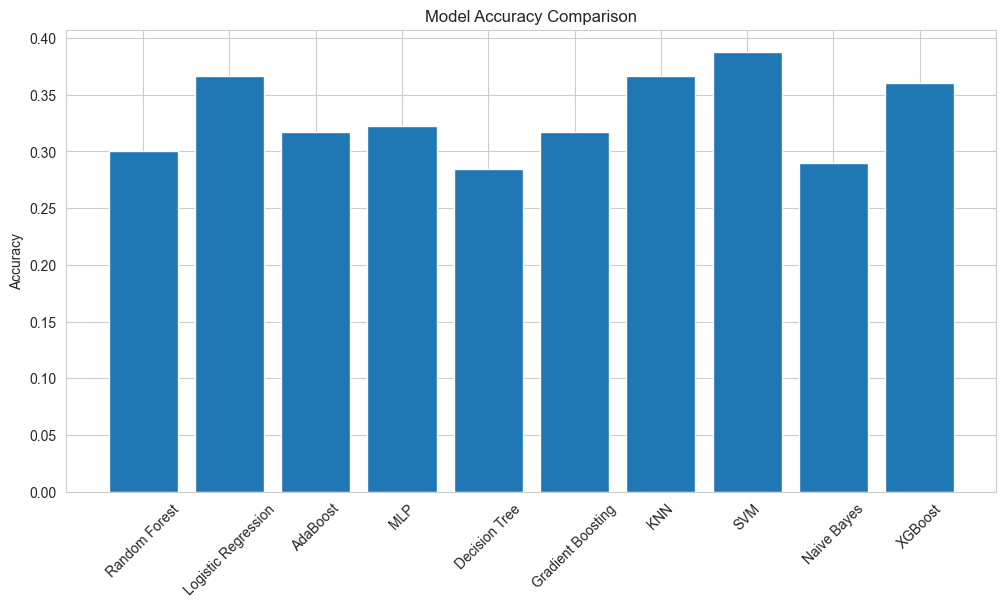

In [51]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import RFE, RFECV
# from sklearn.preprocessing import LabelEncoder
# 
# # Assuming df is your DataFrame and 'target' is your target column
# X = grouped_master_dataset.drop(columns=['Patient ID', 'Visit Date', 'month_interval', 'Visit_Class', 'EVENT_ID', 'CONCOHORT'])
# y = grouped_master_dataset['Visit_Class']
# 
# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# 
# # Transform the target variable
# le = LabelEncoder()
# y = le.fit_transform(y)
# 
# # Recursive Feature Elimination (RFE) with Logistic Regression
# model = LogisticRegression(max_iter=10000)
# # model = DecisionTreeClassifier()
# rfe = RFE(model, n_features_to_select=int(X.shape[1] * 0.25))  # Select top 25% features
# # rfe = RFECV(model)
# rfe.fit(X_scaled, y)
# selected_features = rfe.support_
# # feature_ranks = rfe.ranking_
# 
# # # summarize all features
# # for i in range(X_scaled.shape[1]):
# #     print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
# 
# 
# # Get the column names of the selected features
# selected_columns = X.columns[selected_features]
# print("Top performing columns:")
# print(selected_columns)
# 
# X_selected = X_scaled[:, selected_features]
# 
# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# 
# # List of models
# models = {
#     "Random Forest": RandomForestClassifier(),
#     "Logistic Regression": LogisticRegression(max_iter=10000),
#     "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
#     "MLP": MLPClassifier(max_iter=10000),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "KNN": KNeighborsClassifier(),
#     "SVM": SVC(),
#     "Naive Bayes": GaussianNB(),
#     "XGBoost": XGBClassifier(eval_metric='mlogloss')
# }
# 
# # Train and evaluate each model
# results = {}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     results[name] = accuracy
#     print(f"{name} Accuracy: {accuracy:.4f}")
# 
# # Plot the results
# plt.figure(figsize=(12, 6))
# plt.bar(results.keys(), results.values())
# plt.title('Model Accuracy Comparison')
# plt.ylabel('Accuracy')
# plt.xticks(rotation=45)
# plt.show()

Top performing columns:
Index(['NP3FTAPL', 'NP3PRSPL', 'NP3TTAPL', 'NP3LGAGR', 'NP3RISNG', 'NP3PTRMR',
       'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL',
       'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2EAT', 'NP2HYGN', 'NP2TURN',
       'NP2FREZ', 'NP1SLPD', 'NP1HALL', 'NP1ANXS', 'NP1APAT', 'NP1DDS', 'Area',
       'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent', 'FilledArea',
       'Kurtosis', 'Mean', 'Minor axis length', 'Standard Deviation',
       'brightness', 'contrast', 'correlation', 'dissimilarity', 'energy',
       'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'],
      dtype='object')
Random Forest Accuracy: 0.2842
Logistic Regression Accuracy: 0.3989
AdaBoost Accuracy: 0.3552
MLP Accuracy: 0.3443
Decision Tree Accuracy: 0.2732
Gradient Boosting Accuracy: 0.2896
KNN Accuracy: 0.3497
SVM Accuracy: 0.3661
Naive Bayes Accuracy: 0.2951
XGBoost Accuracy: 0.3388


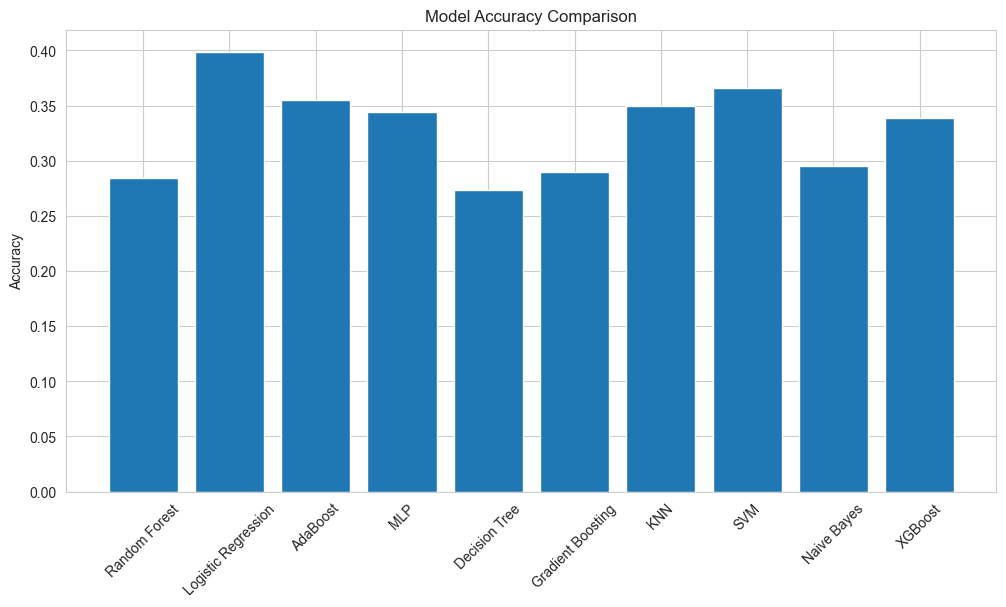

In [52]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import RFE, RFECV
# from sklearn.preprocessing import LabelEncoder
# 
# # Assuming df is your DataFrame and 'target' is your target column
# X = grouped_master_dataset.drop(columns=['Patient ID', 'Visit Date', 'month_interval', 'Visit_Class', 'EVENT_ID', 'CONCOHORT'])
# y = grouped_master_dataset['Visit_Class']
# 
# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# 
# # Transform the target variable
# le = LabelEncoder()
# y = le.fit_transform(y)
# 
# # Recursive Feature Elimination (RFE) with Logistic Regression
# model = LogisticRegression(max_iter=10000)
# # model = DecisionTreeClassifier()
# rfe = RFE(model, n_features_to_select=int(X.shape[1] * 0.5))  # Select top 50% features
# # rfe = RFECV(model)
# rfe.fit(X_scaled, y)
# selected_features = rfe.support_
# # feature_ranks = rfe.ranking_
# 
# # # summarize all features
# # for i in range(X_scaled.shape[1]):
# #     print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
# 
# 
# # Get the column names of the selected features
# selected_columns = X.columns[selected_features]
# print("Top performing columns:")
# print(selected_columns)
# 
# X_selected = X_scaled[:, selected_features]
# 
# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# 
# # List of models
# models = {
#     "Random Forest": RandomForestClassifier(),
#     "Logistic Regression": LogisticRegression(max_iter=10000),
#     "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
#     "MLP": MLPClassifier(max_iter=10000),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "KNN": KNeighborsClassifier(),
#     "SVM": SVC(),
#     "Naive Bayes": GaussianNB(),
#     "XGBoost": XGBClassifier(eval_metric='mlogloss')
# }
# 
# # Train and evaluate each model
# results = {}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     results[name] = accuracy
#     print(f"{name} Accuracy: {accuracy:.4f}")
# 
# # Plot the results
# plt.figure(figsize=(12, 6))
# plt.bar(results.keys(), results.values())
# plt.title('Model Accuracy Comparison')
# plt.ylabel('Accuracy')
# plt.xticks(rotation=45)
# plt.show()

Top performing columns:
Index(['NP3SPCH', 'NP3FACXP', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPL',
       'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR',
       'NP3RISNG', 'NP3GAIT', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR',
       'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ',
       'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SALV', 'NP2EAT', 'NP2HYGN',
       'NP2HWRT', 'NP2TURN', 'NP2TRMR', 'NP2FREZ', 'NP1SLPD', 'NP1URIN',
       'NP1LTHD', 'NP1COG', 'NP1HALL', 'NP1ANXS', 'NP1APAT', 'NP1DDS', 'Area',
       'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent', 'FilledArea',
       'Kurtosis', 'Mean', 'Minor axis length', 'Skewness', 'Solidity',
       'Standard Deviation', 'brightness', 'contrast', 'correlation',
       'dissimilarity', 'energy', 'gabor_energy', 'gabor_entropy',
       'homogeneity', 'lbp_energy', 'lbp_entropy'],
      dtype='object')
Random Forest Accuracy: 0.3770
Logistic Regression Accuracy: 0.3770
AdaBoost Acc

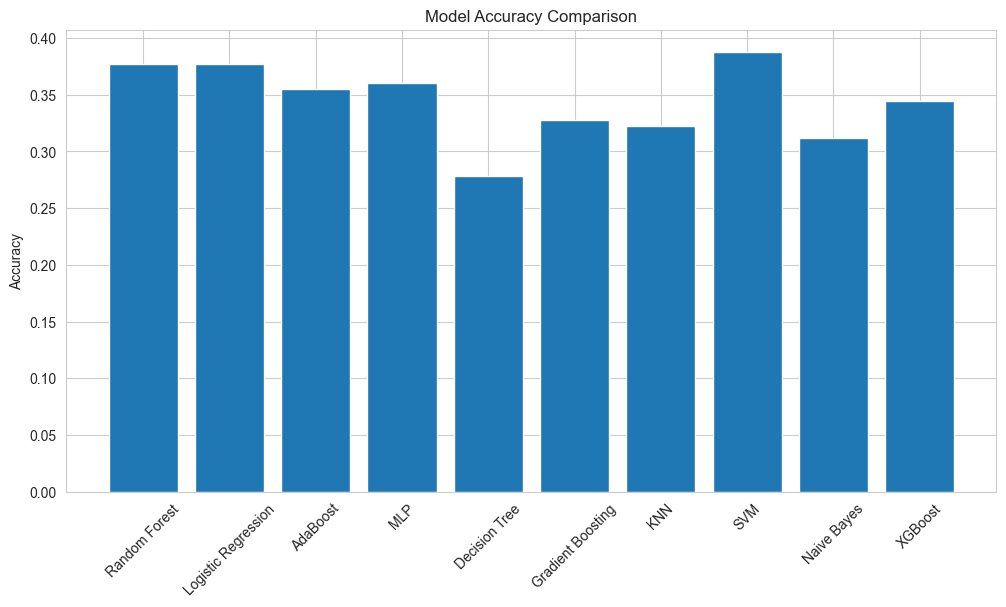

In [53]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import RFE, RFECV
# from sklearn.preprocessing import LabelEncoder
# 
# # Assuming df is your DataFrame and 'target' is your target column
# X = grouped_master_dataset.drop(columns=['Patient ID', 'Visit Date', 'month_interval', 'Visit_Class', 'EVENT_ID', 'CONCOHORT'])
# y = grouped_master_dataset['Visit_Class']
# 
# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# 
# # Transform the target variable
# le = LabelEncoder()
# y = le.fit_transform(y)
# 
# # Recursive Feature Elimination (RFE) with Logistic Regression
# model = LogisticRegression(max_iter=10000)
# # model = DecisionTreeClassifier()
# rfe = RFE(model, n_features_to_select=int(X.shape[1] * 0.75))  # Select top 75% features
# # rfe = RFECV(model)
# rfe.fit(X_scaled, y)
# selected_features = rfe.support_
# # feature_ranks = rfe.ranking_
# 
# # # summarize all features
# # for i in range(X_scaled.shape[1]):
# #     print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
# 
# 
# # Get the column names of the selected features
# selected_columns = X.columns[selected_features]
# print("Top performing columns:")
# print(selected_columns)
# 
# X_selected = X_scaled[:, selected_features]
# 
# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# 
# # List of models
# models = {
#     "Random Forest": RandomForestClassifier(),
#     "Logistic Regression": LogisticRegression(max_iter=10000),
#     "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
#     "MLP": MLPClassifier(max_iter=10000),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "KNN": KNeighborsClassifier(),
#     "SVM": SVC(),
#     "Naive Bayes": GaussianNB(),
#     "XGBoost": XGBClassifier(eval_metric='mlogloss')
# }
# 
# # Train and evaluate each model
# results = {}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     results[name] = accuracy
#     print(f"{name} Accuracy: {accuracy:.4f}")
# 
# # Plot the results
# plt.figure(figsize=(12, 6))
# plt.bar(results.keys(), results.values())
# plt.title('Model Accuracy Comparison')
# plt.ylabel('Accuracy')
# plt.xticks(rotation=45)
# plt.show()

Top performing columns for 25% features:
Index(['NP3TTAPL', 'NP3RTALU', 'DYSKPRES', 'NHY', 'NP2FREZ', 'NP1SLPD', 'Area',
       'ConvexArea', 'EquivDiameter', 'FilledArea', 'Kurtosis', 'Mean',
       'Standard Deviation', 'brightness', 'contrast', 'dissimilarity',
       'energy', 'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'],
      dtype='object')
Random Forest Accuracy with 25% features: 0.3443
Logistic Regression Accuracy with 25% features: 0.3661
AdaBoost Accuracy with 25% features: 0.3169
MLP Accuracy with 25% features: 0.3279
Decision Tree Accuracy with 25% features: 0.3115
Gradient Boosting Accuracy with 25% features: 0.3115
KNN Accuracy with 25% features: 0.3661
SVM Accuracy with 25% features: 0.3880
Naive Bayes Accuracy with 25% features: 0.2896
XGBoost Accuracy with 25% features: 0.3607


/tmp/ipykernel_13795/684250736.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results.keys(), rotation=45)


Top performing columns for 50% features:
Index(['NP3FTAPL', 'NP3PRSPL', 'NP3TTAPL', 'NP3LGAGR', 'NP3RISNG', 'NP3PTRMR',
       'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL',
       'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2EAT', 'NP2HYGN', 'NP2TURN',
       'NP2FREZ', 'NP1SLPD', 'NP1HALL', 'NP1ANXS', 'NP1APAT', 'NP1DDS', 'Area',
       'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent', 'FilledArea',
       'Kurtosis', 'Mean', 'Minor axis length', 'Standard Deviation',
       'brightness', 'contrast', 'correlation', 'dissimilarity', 'energy',
       'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'],
      dtype='object')
Random Forest Accuracy with 50% features: 0.3224
Logistic Regression Accuracy with 50% features: 0.3989
AdaBoost Accuracy with 50% features: 0.3552
MLP Accuracy with 50% features: 0.3607
Decision Tree Accuracy with 50% features: 0.2951
Gradient Boosting Accuracy with 50% features: 0.2896
KNN Accuracy with 50% features: 0.3497
SVM Accura

/tmp/ipykernel_13795/684250736.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results.keys(), rotation=45)


Top performing columns for 75% features:
Index(['NP3SPCH', 'NP3FACXP', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPL',
       'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR',
       'NP3RISNG', 'NP3GAIT', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR',
       'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ',
       'NP3RTCON', 'DYSKPRES', 'NHY', 'NP2SALV', 'NP2EAT', 'NP2HYGN',
       'NP2HWRT', 'NP2TURN', 'NP2TRMR', 'NP2FREZ', 'NP1SLPD', 'NP1URIN',
       'NP1LTHD', 'NP1COG', 'NP1HALL', 'NP1ANXS', 'NP1APAT', 'NP1DDS', 'Area',
       'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent', 'FilledArea',
       'Kurtosis', 'Mean', 'Minor axis length', 'Skewness', 'Solidity',
       'Standard Deviation', 'brightness', 'contrast', 'correlation',
       'dissimilarity', 'energy', 'gabor_energy', 'gabor_entropy',
       'homogeneity', 'lbp_energy', 'lbp_entropy'],
      dtype='object')
Random Forest Accuracy with 75% features: 0.3552
Logistic Regre

/tmp/ipykernel_13795/684250736.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results.keys(), rotation=45)


Random Forest Accuracy with 100% features: 0.3279
Logistic Regression Accuracy with 100% features: 0.4098
AdaBoost Accuracy with 100% features: 0.3169
MLP Accuracy with 100% features: 0.3443
Decision Tree Accuracy with 100% features: 0.3115
Gradient Boosting Accuracy with 100% features: 0.3552
KNN Accuracy with 100% features: 0.3005
SVM Accuracy with 100% features: 0.3880
Naive Bayes Accuracy with 100% features: 0.3224
XGBoost Accuracy with 100% features: 0.3388


/tmp/ipykernel_13795/684250736.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results.keys(), rotation=45)


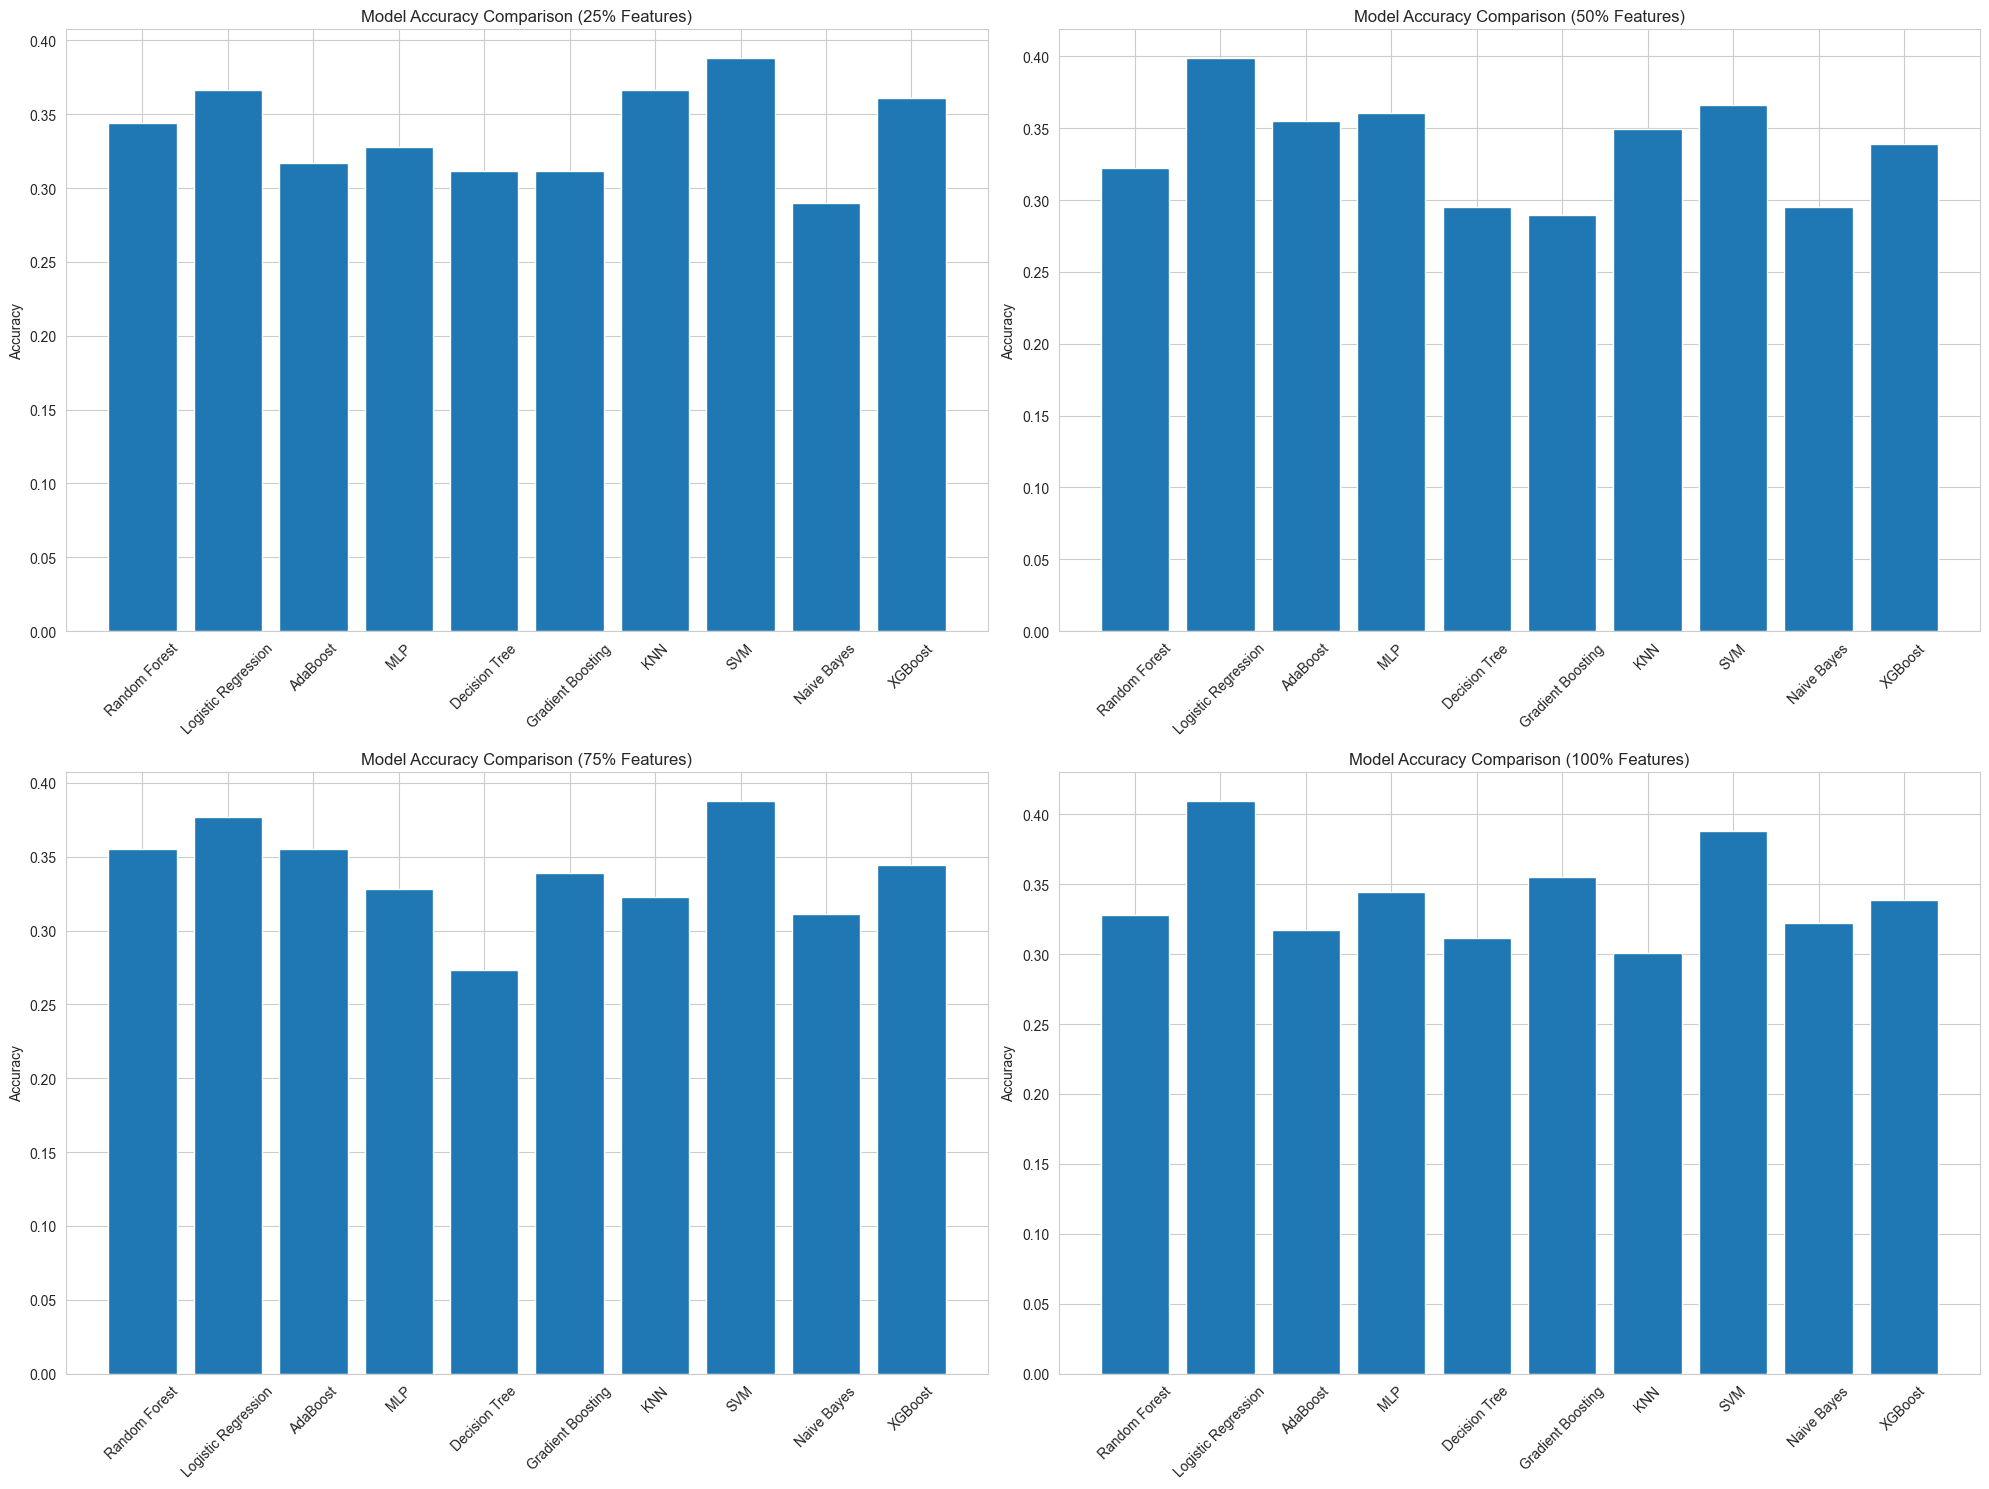

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'target' is your target column
X = grouped_master_dataset.drop(columns=['Patient ID', 'Visit Date', 'month_interval', 'Visit_Class', 'EVENT_ID', 'CONCOHORT'])
y = grouped_master_dataset['Visit_Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Transform the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Define the percentages of features to select
feature_percentages = [0.25, 0.50, 0.75, 1.00]

# List of models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "MLP": MLPClassifier(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

for i, percentage in enumerate(feature_percentages):
    # Recursive Feature Elimination (RFE) with Logistic Regression
    model = LogisticRegression(max_iter=10000)
    n_features_to_select = int(X.shape[1] * percentage)
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    rfe.fit(X_scaled, y)
    selected_features = rfe.support_

    # Get the column names of the selected features
    selected_columns = X.columns[selected_features]
    print(f"Top performing columns for {int(percentage * 100)}% features:")
    print(selected_columns)

    X_selected = X_scaled[:, selected_features]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"{name} Accuracy with {int(percentage * 100)}% features: {accuracy:.4f}")

    # Plot the results
    ax = axs[i // 2, i % 2]
    ax.bar(results.keys(), results.values())
    ax.set_title(f'Model Accuracy Comparison ({int(percentage * 100)}% Features)')
    ax.set_ylabel('Accuracy')
    ax.set_xticklabels(results.keys(), rotation=45)

plt.tight_layout()
plt.show()